# Exploratory data analysis

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("data.csv", encoding='latin1')


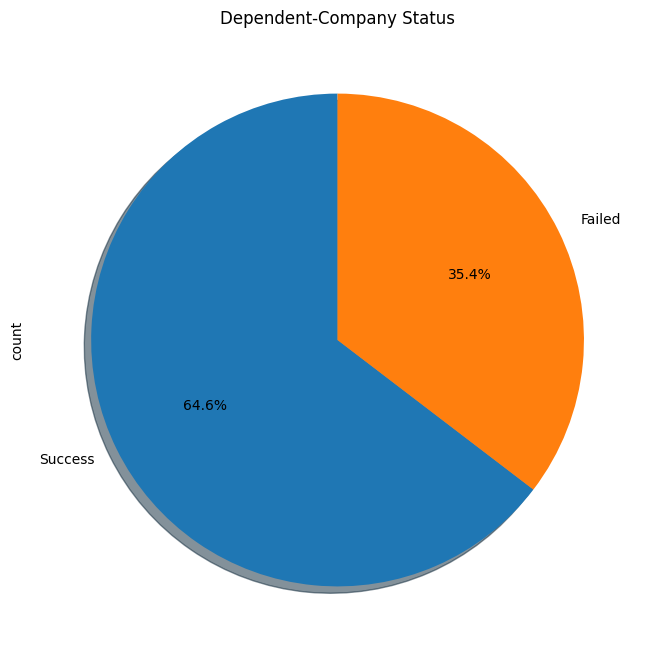

In [31]:
plt.figure(figsize = (8,8))
df['Dependent-Company Status'].value_counts().plot(kind='pie',shadow=True, startangle=90,autopct='%1.1f%%')
plt.title('Dependent-Company Status')
plt.show()

<blockquote style="font-size: 16px; font-style: italic; color: #333;">

Failed companies constitute 35.38% of the dataset, while successful companies make up 64.62%. This visually compelling bar plot offers a clear understanding of the distribution of company statuses.
</blockquote>


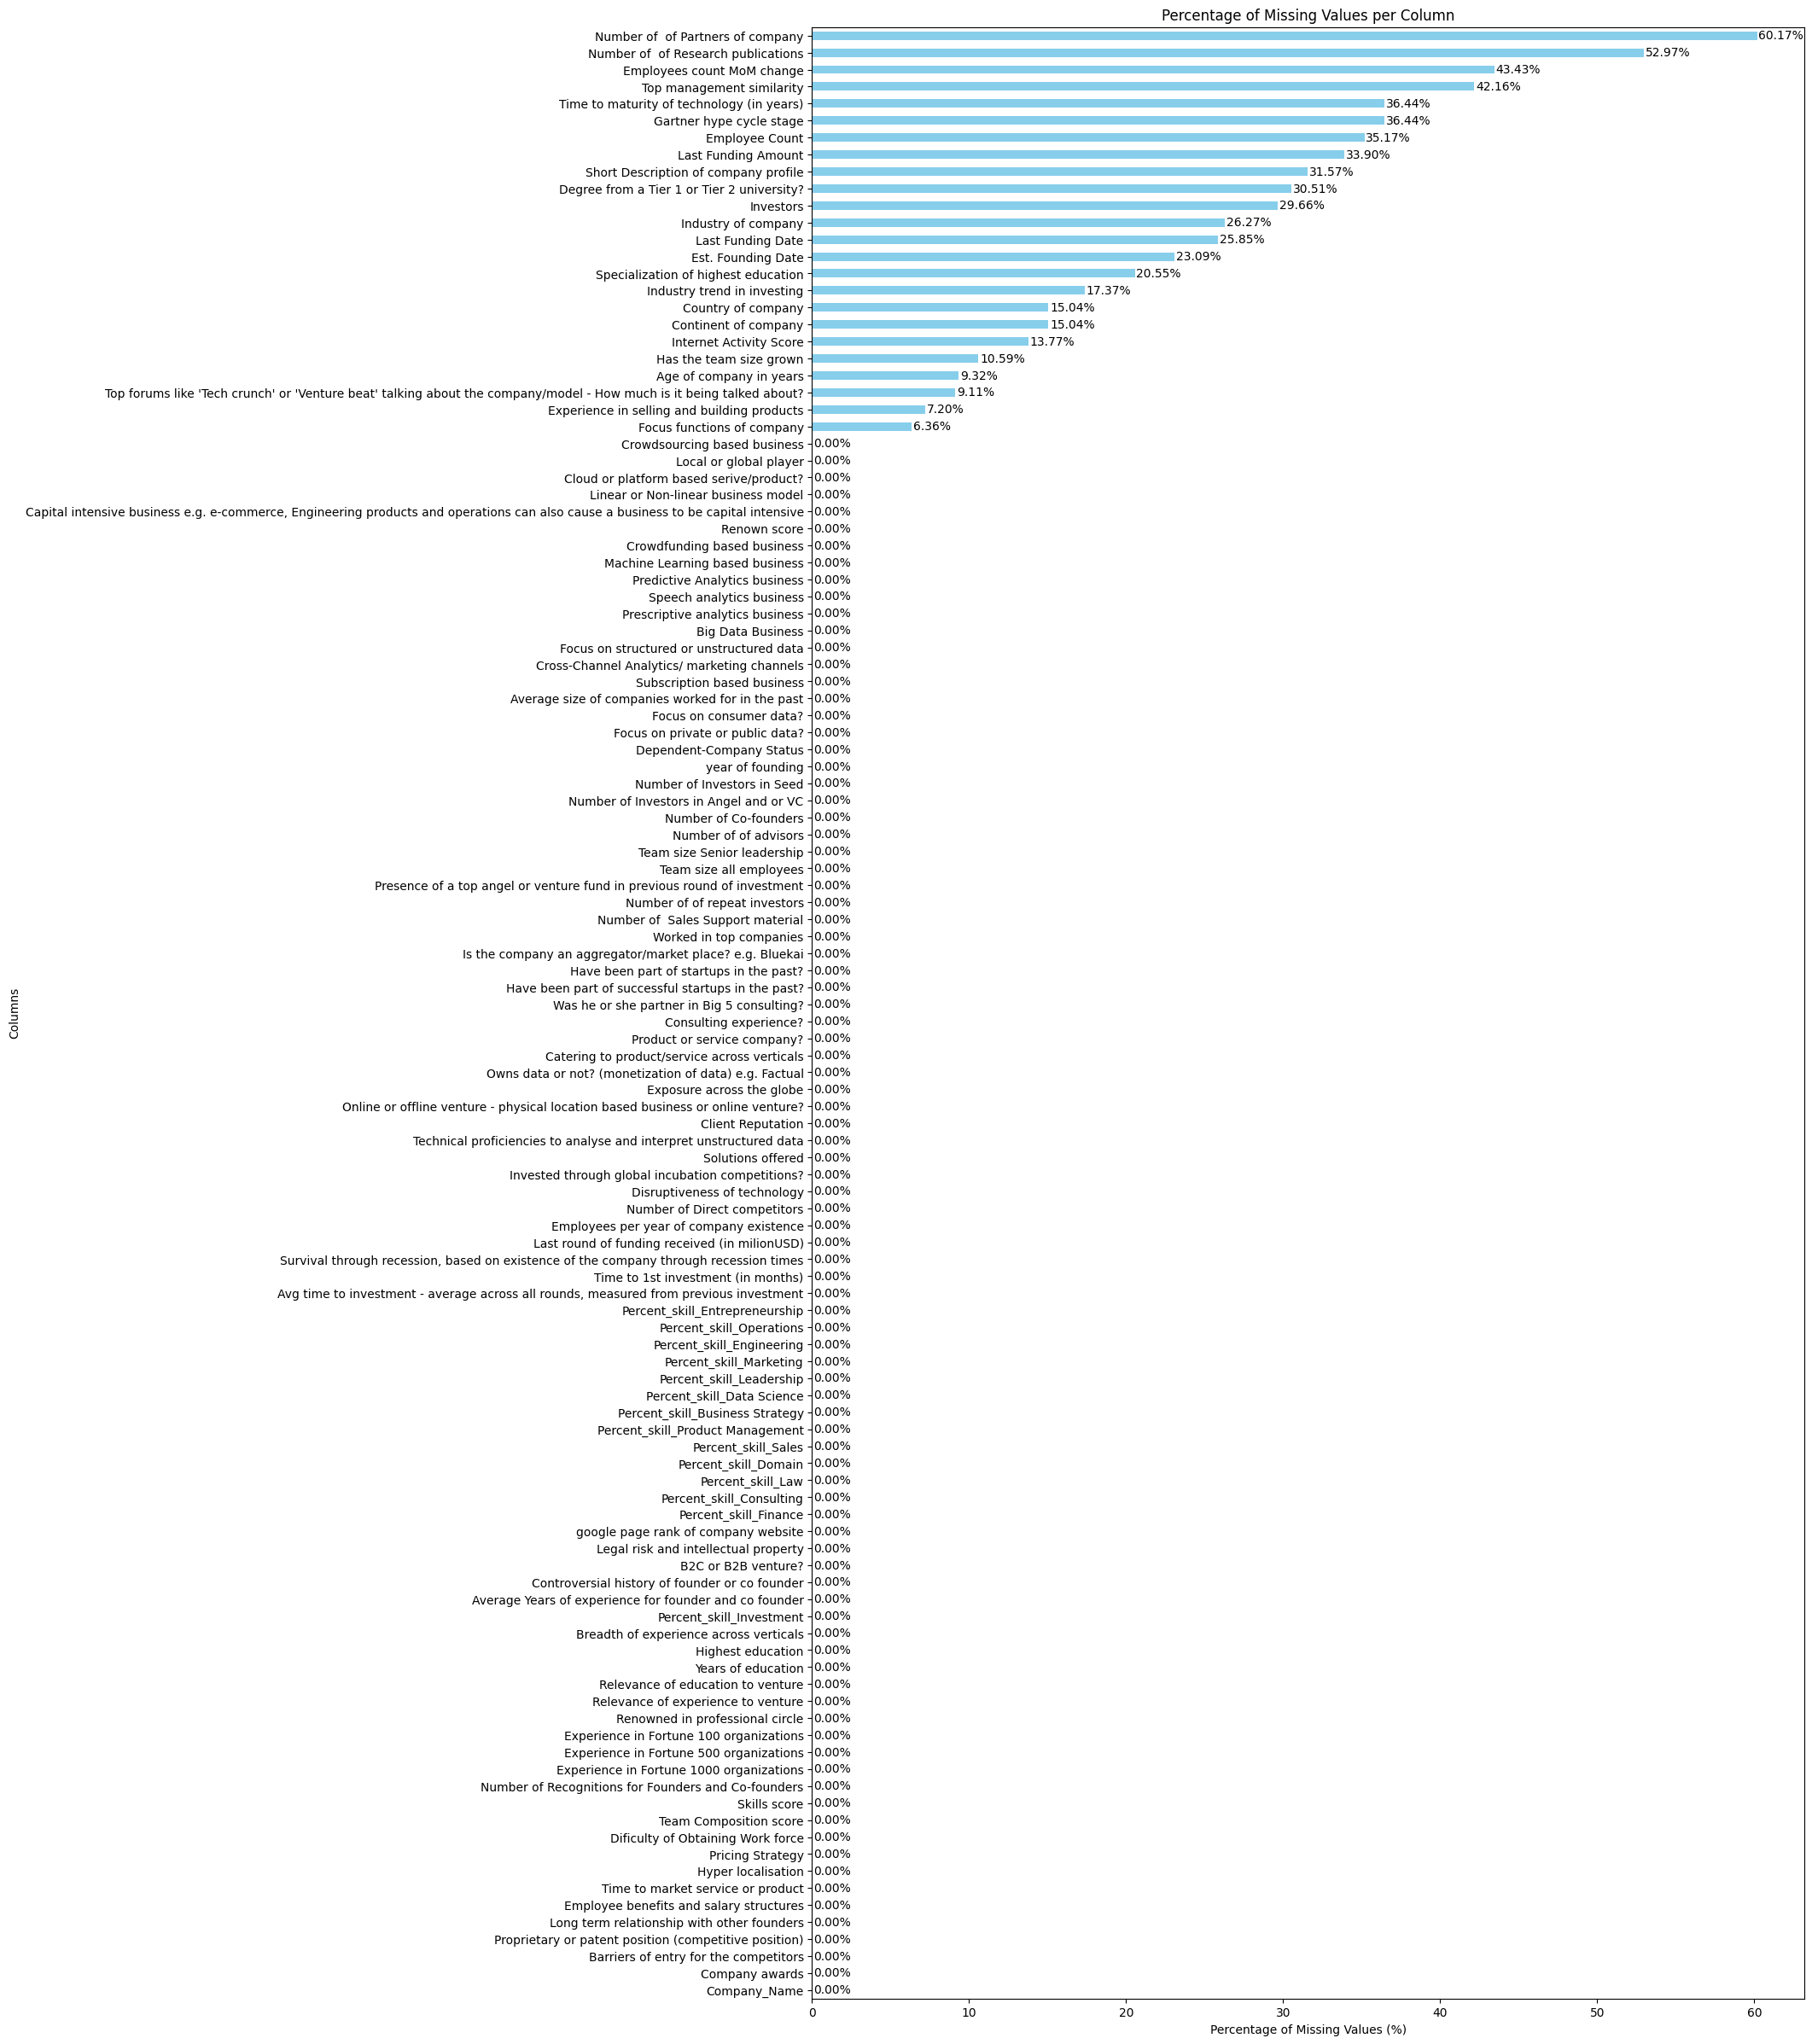

In [32]:
perct_missing_values = df.isnull().sum() * 100 / len(df)
perct_missing_values_sorted = perct_missing_values.sort_values()

plt.figure(figsize=(15, 30))
ax = perct_missing_values_sorted.plot(kind='barh', color='skyblue')


for i, v in enumerate(perct_missing_values_sorted):
    ax.text(v + 0.1, i, f'{v:.2f}%', color='black', va='center')

plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values per Column')
plt.show()


The code is imputing missing values for numeric columns using either the mean or median, and for categorical variables, it's imputing missing values with the mode.


In [33]:
success_companies = df[df['Dependent-Company Status'] == 'Success']
failed_companies = df[df['Dependent-Company Status'] == 'Failed']

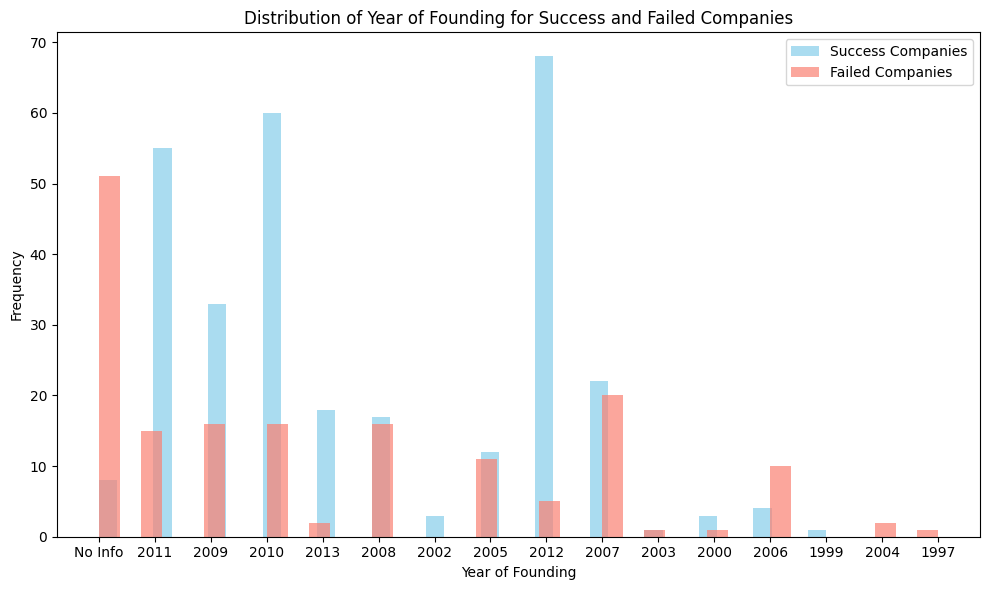

In [34]:
success_companies_year_of_founding = success_companies['year of founding']
failed_companies_year_of_founding = failed_companies['year of founding']

frame = pd.concat([success_companies_year_of_founding, failed_companies_year_of_founding], axis=1)
frame.columns = ['Success Companies', 'Failed Companies']

colors = ['skyblue', 'salmon']

plt.figure(figsize=(10, 6))
for i, column in enumerate(frame.columns):
    plt.hist(frame[column].dropna(), bins=40, alpha=0.7, label=column, color=colors[i])

plt.xlabel('Year of Founding')
plt.ylabel('Frequency')
plt.title('Distribution of Year of Founding for Success and Failed Companies')
plt.legend()

plt.tight_layout()
plt.show()



<blockquote style="font-size: 16px; font-style: italic;">
Before 2008, the number of successful and failed companies was roughly equal. However, after 2008, there is a significant disparity, with successful companies outnumbering failed ones by a considerable margin.
</blockquote>

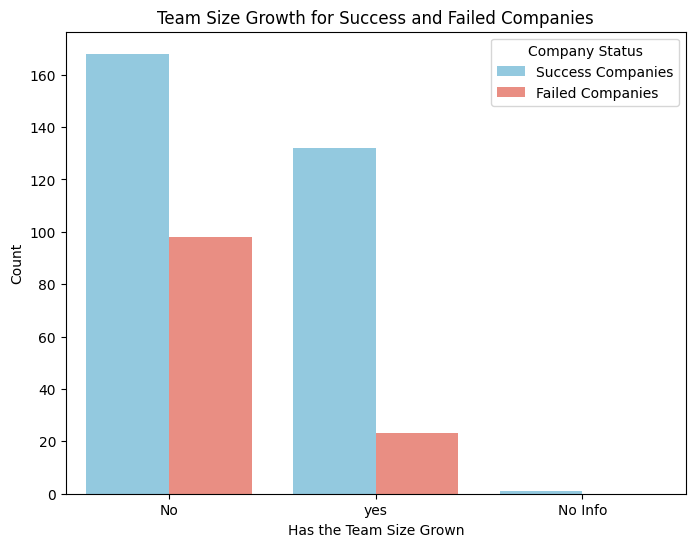

In [35]:

success_companies_Has_the_team_size_grown = success_companies['Has the team size grown']
failed_companies_Has_the_team_size_grown = failed_companies['Has the team size grown']

success_companies_Has_the_team_size_grown = success_companies_Has_the_team_size_grown.replace('Yes', 'yes')
success_companies_Has_the_team_size_grown = success_companies_Has_the_team_size_grown.replace('YES', 'yes')

failed_companies_Has_the_team_size_grown = failed_companies_Has_the_team_size_grown.replace('YES', 'yes')
failed_companies_Has_the_team_size_grown = failed_companies_Has_the_team_size_grown.replace('Yes', 'yes')

frame = pd.concat([success_companies_Has_the_team_size_grown, failed_companies_Has_the_team_size_grown], axis=1)
frame.columns = ['Success Companies', 'Failed Companies']

frame_melted = frame.melt(var_name='Company Status', value_name='Has the team size grown')

plt.figure(figsize=(8, 6))
sns.countplot(data=frame_melted, x='Has the team size grown', hue='Company Status', palette=['skyblue', 'salmon'])

plt.xlabel('Has the Team Size Grown')
plt.ylabel('Count')
plt.title('Team Size Growth for Success and Failed Companies')
plt.legend(title='Company Status')

plt.show()



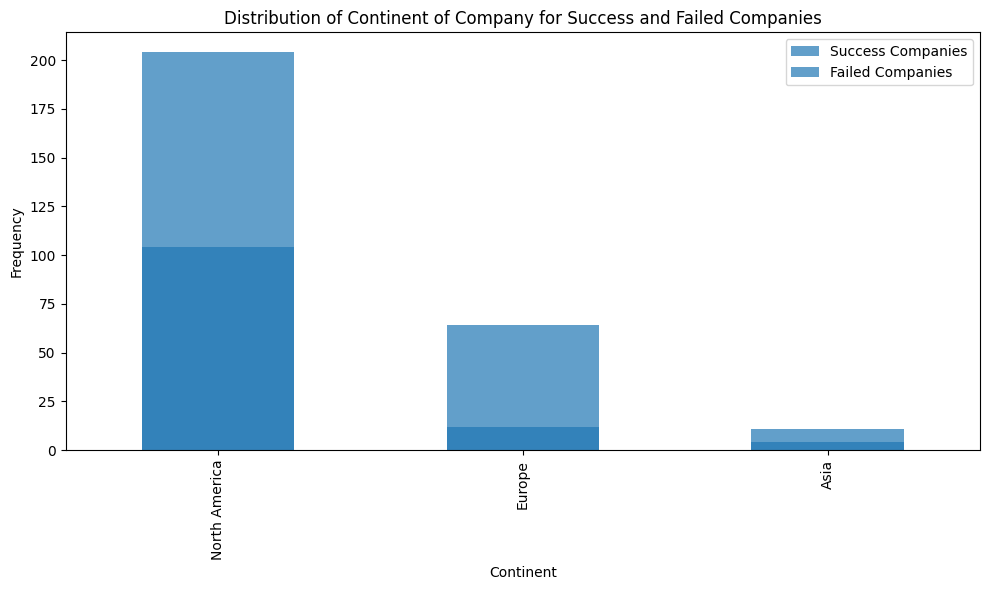

In [36]:

success_companies_Continent_of_company	 = success_companies['Continent of company']
failed_companies_Continent_of_company	 = failed_companies['Continent of company']

frame = pd.concat([success_companies_Continent_of_company, failed_companies_Continent_of_company], axis=1)
frame.columns = ['Success Companies', 'Failed Companies']

plt.figure(figsize=(10, 6))
for column in frame.columns:
    frame[column].value_counts().plot(kind='bar', alpha=0.7, label=column)

plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.title('Distribution of Continent of Company for Success and Failed Companies')
plt.legend()

plt.tight_layout()
plt.show()




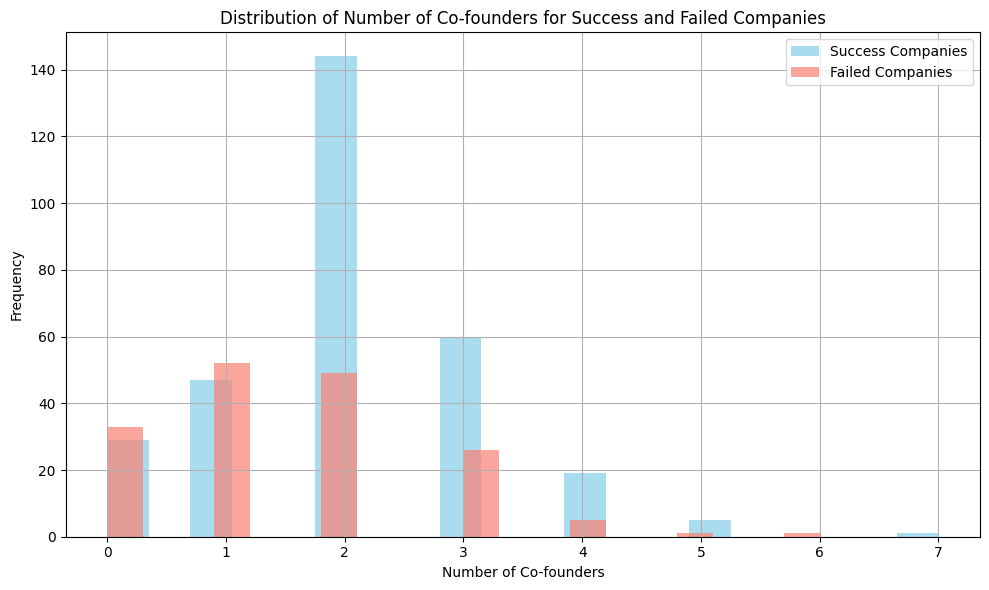

In [37]:
success_companies_Num_Co_founders = success_companies['Number of Co-founders']
failed_companies_Num_Co_founders = failed_companies['Number of Co-founders']

plt.figure(figsize=(10, 6))

plt.hist(success_companies_Num_Co_founders.dropna(), bins=20, alpha=0.7, color='skyblue', label='Success Companies')

plt.hist(failed_companies_Num_Co_founders.dropna(), bins=20, alpha=0.7, color='salmon', label='Failed Companies')

plt.xlabel('Number of Co-founders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Co-founders for Success and Failed Companies')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


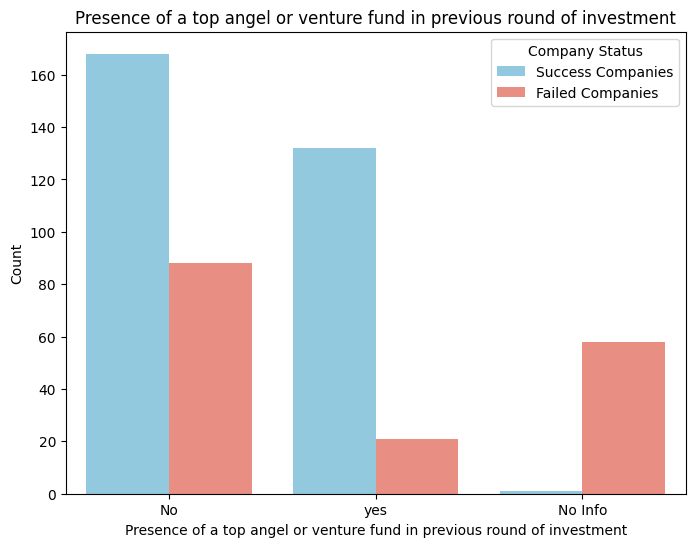

In [38]:
success_companies_frame = success_companies['Presence of a top angel or venture fund in previous round of investment']
failed_companies_frame = failed_companies['Presence of a top angel or venture fund in previous round of investment']

success_companies_frame = success_companies_Has_the_team_size_grown.replace('Yes', 'yes')
success_companies_frame = success_companies_Has_the_team_size_grown.replace('YES', 'yes')

failed_companies_frame = failed_companies_frame.replace('YES', 'yes')
failed_companies_frame = failed_companies_frame.replace('Yes', 'yes')

frame = pd.concat([success_companies_frame, failed_companies_frame], axis=1)
frame.columns = ['Success Companies', 'Failed Companies']

frame_melted = frame.melt(var_name='Company Status', value_name='Presence of a top angel or venture fund in previous round of investment')

plt.figure(figsize=(8, 6))
sns.countplot(data=frame_melted, x='Presence of a top angel or venture fund in previous round of investment', hue='Company Status', palette=['skyblue', 'salmon'])

plt.xlabel('Presence of a top angel or venture fund in previous round of investment')
plt.ylabel('Count')
plt.title('Presence of a top angel or venture fund in previous round of investment')
plt.legend(title='Company Status')

plt.show()

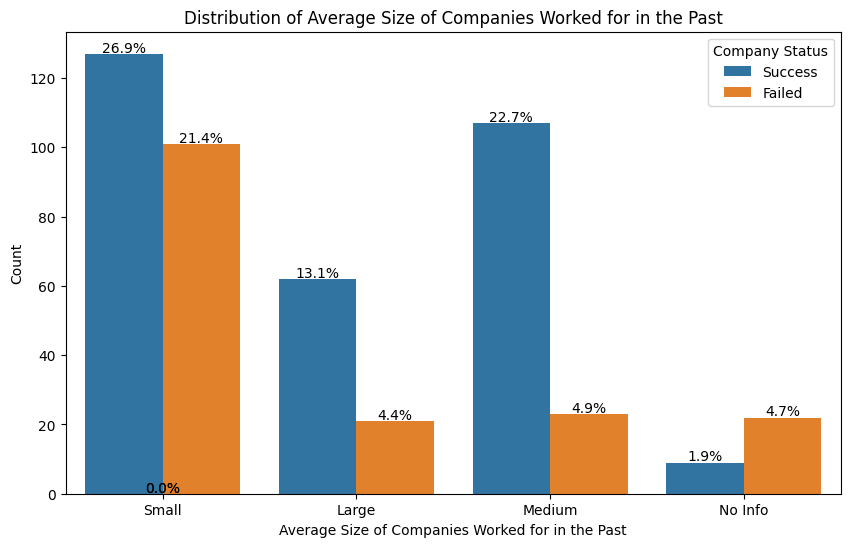

In [39]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Average size of companies worked for in the past', hue='Dependent-Company Status', data=df)
plt.title('Distribution of Average Size of Companies Worked for in the Past')
plt.xlabel('Average Size of Companies Worked for in the Past')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


<st>
The distribution analysis of the average size of companies worked for in the past reveals intriguing insights. Among successful companies, a notable portion, approximately 26.9%, have a small average size of companies they've previously worked for, while only 21.4% of failed companies share this characteristic. Moreover, a smaller fraction of successful companies, around 13.1%, have experience with large companies, contrasting with a mere 4.4% of failed companies. In terms of the median average size, approximately 22.7% of successful companies have worked with companies of median size, compared to only 4.9% of failed companies. These disparities underscore potential trends in the association between prior work experiences and company success, suggesting that successful ventures may have more varied experiences across company sizes.

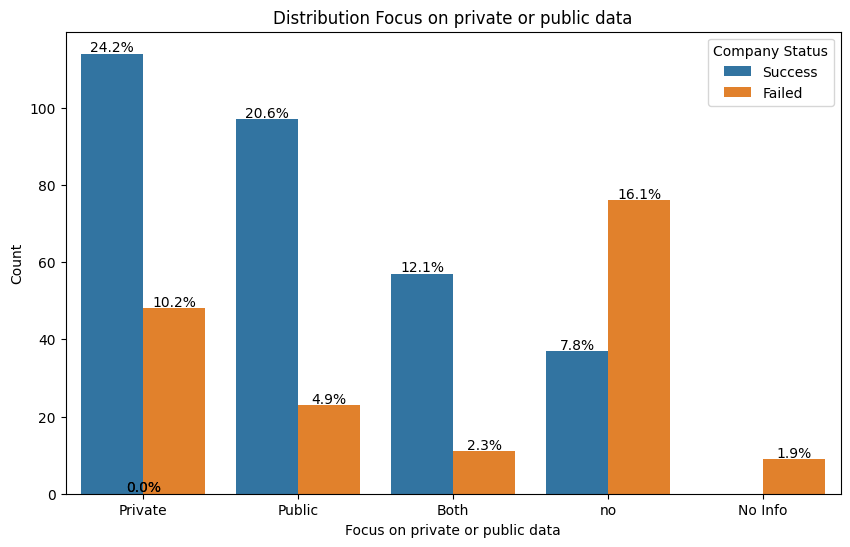

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Focus on private or public data?', hue='Dependent-Company Status', data=df)
plt.title('Distribution Focus on private or public data')
plt.xlabel('Focus on private or public data')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of Focus on Private or Public Data

The analysis of the focus on private or public data unveils intriguing patterns. Among successful companies, approximately 24.2% primarily focus on private data, while only 10.2% of failed companies share this emphasis. Conversely, about 20.6% of successful companies concentrate on public data, compared to merely 4.9% of failed companies. Furthermore, 12.1% of successful companies operate with a dual focus on both private and public data, contrasting with a smaller percentage of 2.3% among failed companies. Notably, a smaller proportion of successful ventures, around 7.8%, opt for neither private nor public data focus, while this percentage is significantly higher at 16.1% for failed companies. These findings highlight the potential influence of data focus strategies on company success, suggesting that successful ventures often prioritize private or public data strategies, or a combination thereof, while failed companies exhibit a broader diversity in data focus approaches.


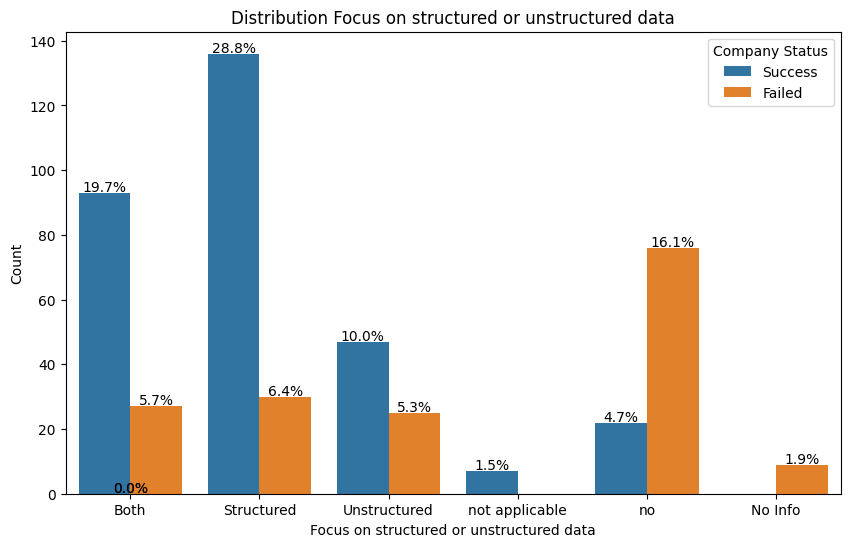

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Focus on structured or unstructured data', hue='Dependent-Company Status', data=df)
plt.title('Distribution Focus on structured or unstructured data')
plt.xlabel('Focus on structured or unstructured data')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()

Analysis of Focus on Structured or Unstructured Data

The examination of the focus on structured or unstructured data presents intriguing insights into company strategies. Among successful companies, approximately 28.8% primarily focus on structured data, which is significantly higher than the 6.4% of failed companies that share this emphasis. In contrast, around 10% of successful companies concentrate on unstructured data, compared to 5.3% of failed companies. Moreover, a notable proportion of successful ventures, approximately 19.7%, operate with a dual focus on both structured and unstructured data, contrasting with a smaller percentage of 5.7% among failed companies. Additionally, a smaller proportion of successful ventures, approximately 4.7%, opt for neither structured nor unstructured data focus, while this percentage is notably higher at 16.7% for failed companies. Finally, a small fraction of successful companies, approximately 1.5%, indicate that the question is not applicable, while there are no corresponding failed companies in this category. These findings underscore the potential impact of data structure strategies on company success, suggesting that successful ventures often prioritize structured or unstructured data strategies, or a combination thereof, while failed companies exhibit a broader diversity in data structure approaches.


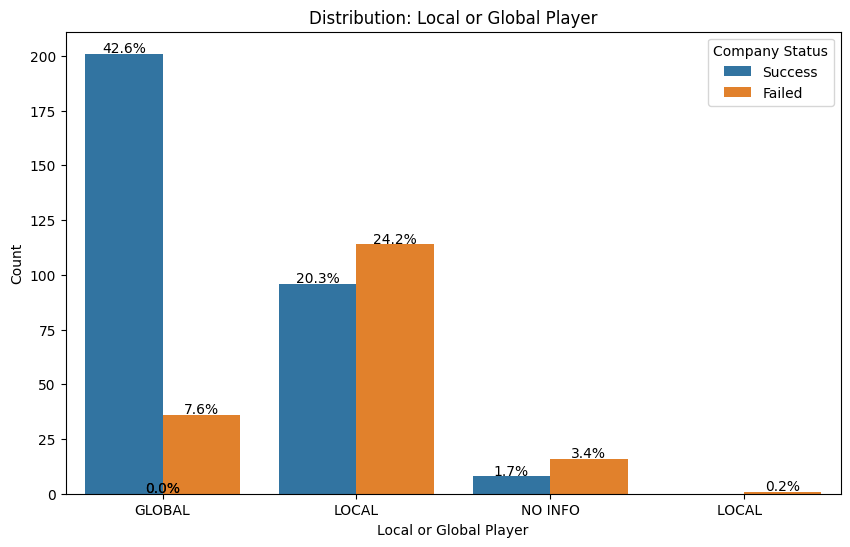

In [42]:

plt.figure(figsize=(10, 6))

df['Local or global player'] = df['Local or global player'].str.upper()

ax = sns.countplot(x='Local or global player', hue='Dependent-Company Status', data=df)
plt.title('Distribution: Local or Global Player')
plt.xlabel('Local or Global Player')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()

Analysis of Local or Global Player

The analysis of whether companies operate as local or global players reveals significant differences in success rates based on their market scope. Among successful companies, approximately 42.6% identify as local players, which is substantially higher than the 7.6% of failed companies with a similar designation. Conversely, around 20.3% of successful companies position themselves as global players, while 24.2% of failed companies share this global scope. These findings highlight the importance of market positioning in determining company success, suggesting that successful ventures often excel in either local or global markets, while failed companies may struggle to establish a strong presence in either domain.


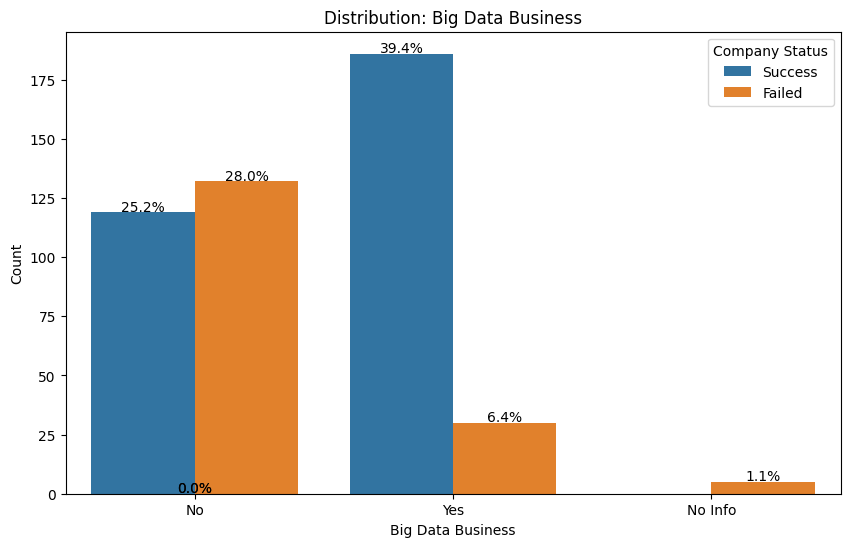

In [43]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Big Data Business', hue='Dependent-Company Status', data=df)
plt.title('Distribution: Big Data Business')
plt.xlabel('Big Data Business')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of Big Data Business

The examination of whether companies are engaged in big data business activities unveils notable differences in success rates based on their involvement in this domain. Among successful companies, approximately 39.4% are involved in big data business, which is substantially higher than the 6.4% of failed companies with similar involvement. Conversely, around 25.2% of successful companies are not engaged in big data business, while 28.0% of failed companies share this characteristic. These findings underscore the potential impact of involvement in big data business on company success, suggesting that companies involved in this domain tend to exhibit higher success rates compared to those that are not.


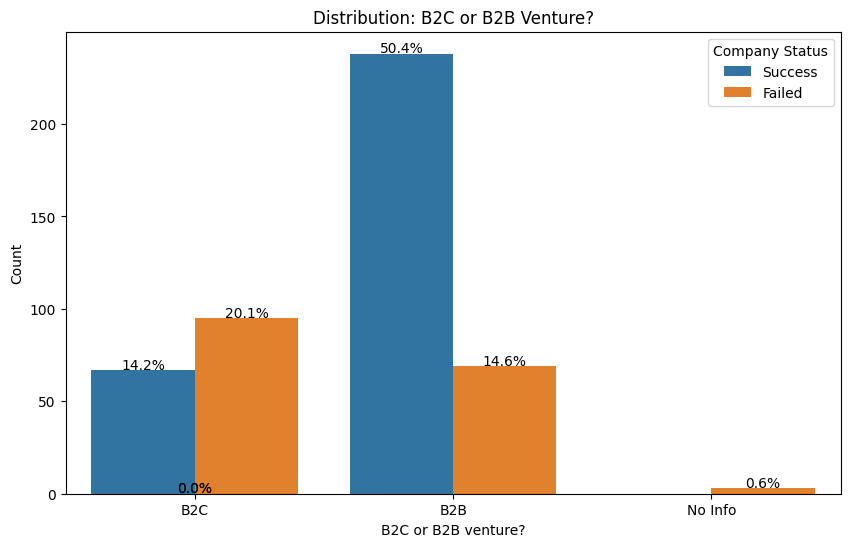

In [44]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='B2C or B2B venture?', hue='Dependent-Company Status', data=df)
plt.title('Distribution: B2C or B2B Venture?')
plt.xlabel('B2C or B2B venture?')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of B2C or B2B Venture

The analysis of whether companies operate in a Business-to-Consumer (B2C) or Business-to-Business (B2B) model provides valuable insights into their market orientation. Among successful companies, approximately 14.2% are categorized as B2C ventures, a notably smaller percentage compared to the 20.1% of failed companies operating in the same category. Conversely, a significant majority of successful ventures, accounting for approximately 50.4%, operate in the B2B sector, showcasing a substantial contrast with the 14.6% of failed companies in this category. These findings highlight the prevalence of B2B ventures among successful companies, suggesting that a focus on business-to-business relationships may contribute significantly to their success compared to their B2C counterparts.


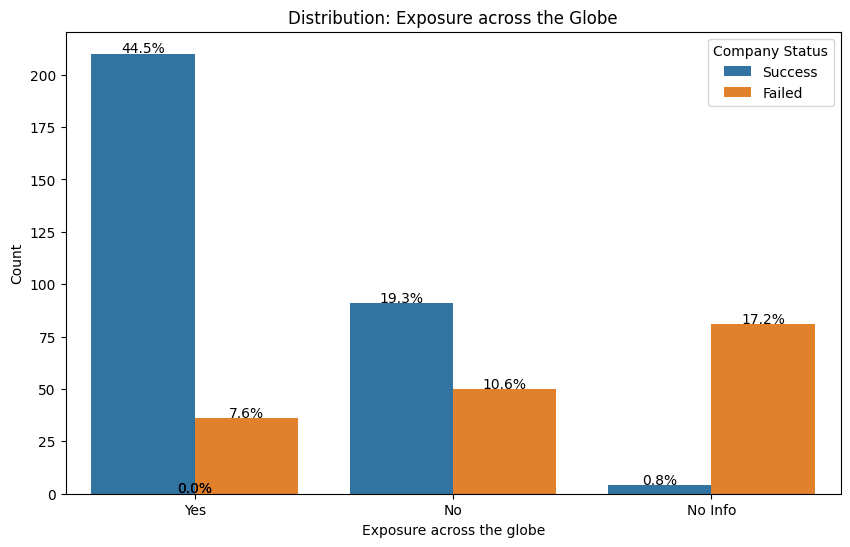

In [45]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Exposure across the globe", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Exposure across the Globe')
plt.xlabel('Exposure across the globe')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of Exposure Across the Globe

The analysis of exposure across the globe reveals significant differences in company strategies. Among successful companies, approximately 44.5% have exposure across the globe, which is markedly higher than the 7.6% of failed companies with a similar global presence. Conversely, around 19.3% of successful companies do not have global exposure, compared to 10.6% of failed companies. These findings underscore the potential importance of global exposure for company success, suggesting that successful ventures often prioritize expanding their presence across the globe, while failed companies may have more localized or limited international strategies.


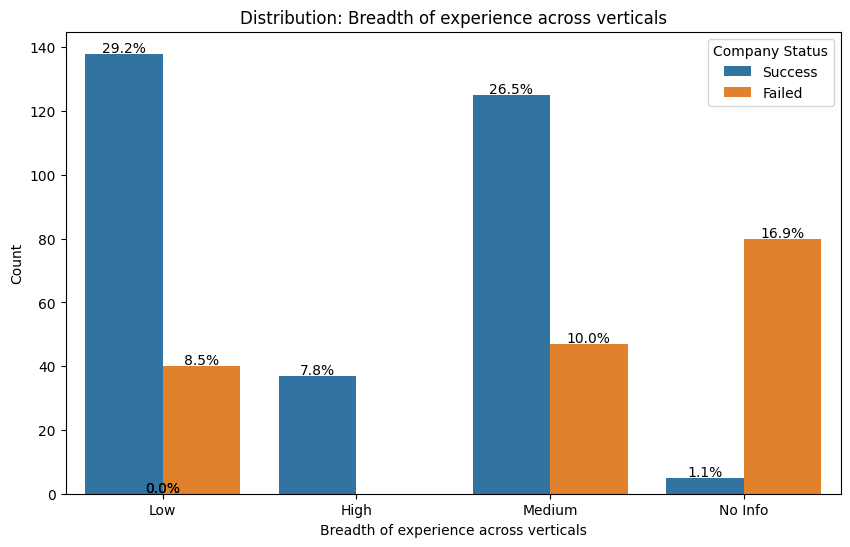

In [46]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Breadth of experience across verticals", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Breadth of experience across verticals')
plt.xlabel('Breadth of experience across verticals')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()



Analysis of Breadth of Experience Across Verticals:

We conducted an analysis on the breadth of experience across verticals among successful and failed companies. The results indicate significant differences in the distribution of this factor between successful and failed companies.

High Breadth of Experience:

Success: 7.8%
Failed: 0.0%
Companies with a high breadth of experience across verticals have a notably higher success rate compared to failed companies.

Low Breadth of Experience:

Success: 29.2%
Failed: 8.5%
Companies with a low breadth of experience across verticals show a substantial difference in success rates compared to failed companies, indicating that a lack of diverse experience may contribute to failure.

Medium Breadth of Experience:

Success: 26.5%
Failed: 10.0%
The success rate for companies with a medium breadth of experience across verticals is higher than that of failed companies but lower than those with high breadth, suggesting a moderate impact on company success.

These findings highlight the importance of having a broad range of experience across verticals for company success and emphasize the potential risks associated with limited experience in diverse domains







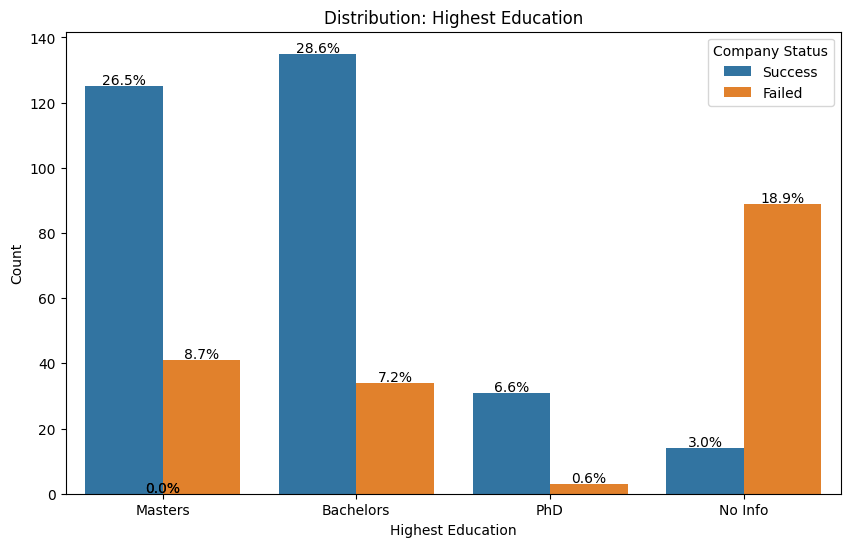

In [47]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Highest education", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Highest Education')
plt.xlabel('Highest Education')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of the highest education level attained by individuals in successful and failed companies reveals notable differences. Among successful companies, the distribution of highest education shows that 26.5% of individuals hold a Master's degree, 28.6% have a Bachelor's degree, and 6.6% possess a Ph.D. Conversely, in failed companies, the percentages are lower, with 8.7% holding a Master's degree, 7.2% having a Bachelor's degree, and only 0.6% possessing a Ph.D. This suggests that individuals with higher educational qualifications, particularly Master's and Ph.D. degrees, are more prevalent in successful companies compared to failed ones.


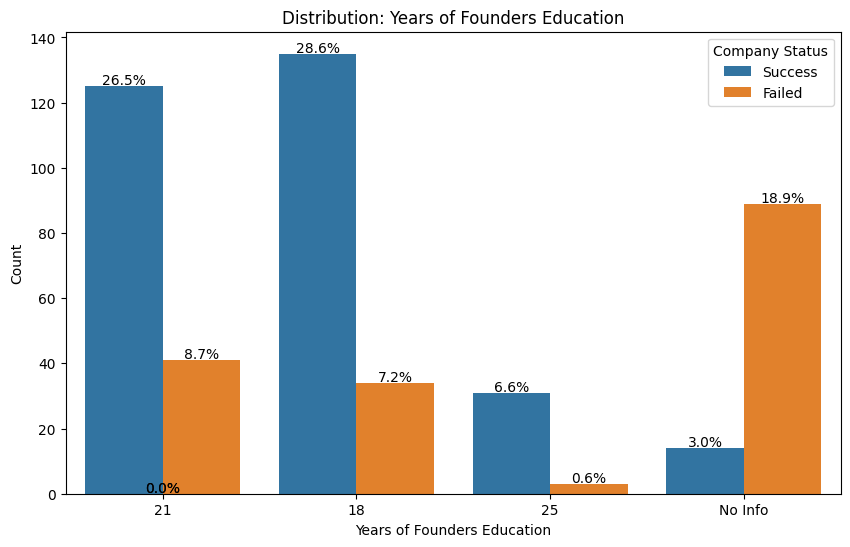

In [48]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Years of education", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Years of Founders Education')
plt.xlabel('Years of Founders Education')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


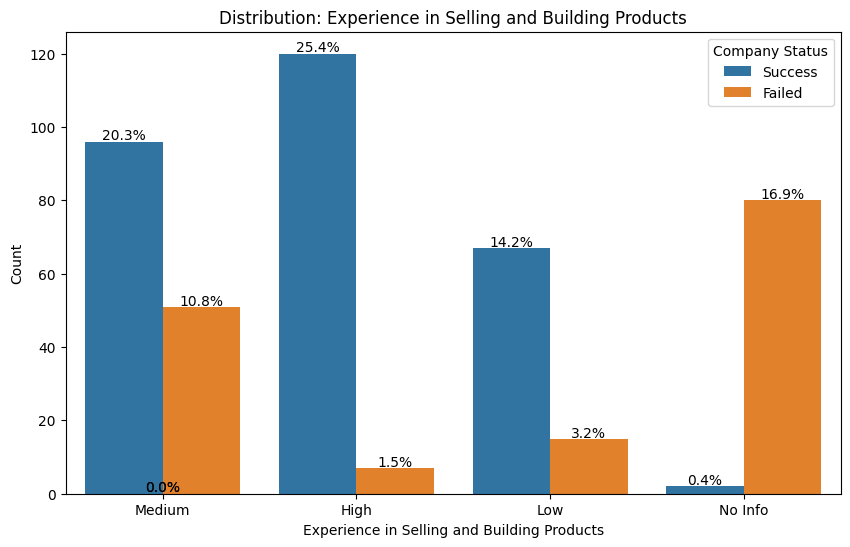

In [49]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Experience in selling and building products", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Experience in Selling and Building Products')
plt.xlabel('Experience in Selling and Building Products')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Description of "Experience in selling and building products" Distribution:

The "Experience in selling and building products" feature provides insights into the level of experience individuals have in the domain of selling and building products.

Based on our analysis:

High Experience: Approximately 25.4% of successful companies and 1.5% of failed companies have high experience in selling and building products. This suggests that a significantly higher proportion of successful companies possess extensive expertise in this area compared to failed ones.

Low Experience: About 14.2% of successful companies and 3.2% of failed companies exhibit low experience in selling and building products. Although a lower percentage of both successful and failed companies fall into this category, the proportion is relatively higher among failed companies.

Medium Experience: Around 20.3% of successful companies and 10.8% of failed companies have a medium level of experience in selling and building products. This category represents individuals with moderate expertise, and while successful companies still outnumber failed ones, the difference is less pronounced compared to the high experience category.

Overall, the data indicates a significant correlation between the level of experience in selling and building products and the success of companies. Companies with higher levels of experience in this domain tend to have a greater likelihood of success.

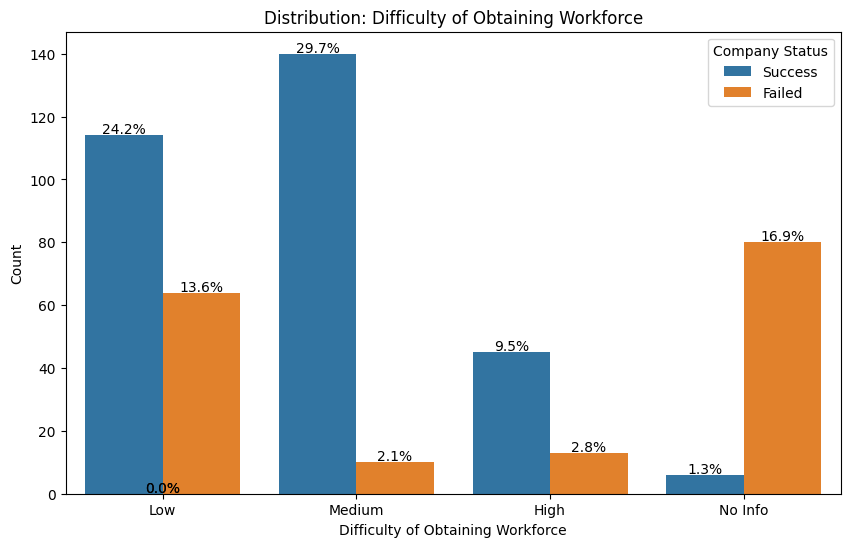

In [50]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Dificulty of Obtaining Work force", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Difficulty of Obtaining Workforce')
plt.xlabel('Difficulty of Obtaining Workforce')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()

The "Difficulty of Obtaining Workforce" feature indicates the perceived level of difficulty in acquiring qualified personnel for a company. This feature has been categorized into three levels: high, medium, and low. The percentages represent the distribution of successful and failed companies across these difficulty levels.

High Difficulty (9.5% Success, 2.8% Failed):
Companies facing high difficulty in obtaining a workforce account for 9.5% of successful companies and 2.8% of failed companies. This suggests that while fewer successful companies experience high workforce acquisition challenges compared to failed ones, it remains a factor for consideration.

Medium Difficulty (29.7% Success, 2.1% Failed):
Medium difficulty in obtaining a workforce is observed in 29.7% of successful companies and 2.1% of failed companies. This indicates a higher prevalence of medium-level challenges among successful companies compared to failed ones.

Low Difficulty (24.2% Success, 13.6% Failed):
Companies facing low difficulty in obtaining a workforce represent 24.2% of successful companies and 13.6% of failed companies. This suggests that a larger proportion of successful companies experience fewer challenges in workforce acquisition compared to failed companies.

Overall, the distribution highlights the varying levels of difficulty in obtaining a workforce and their association with the success or failure of companies.

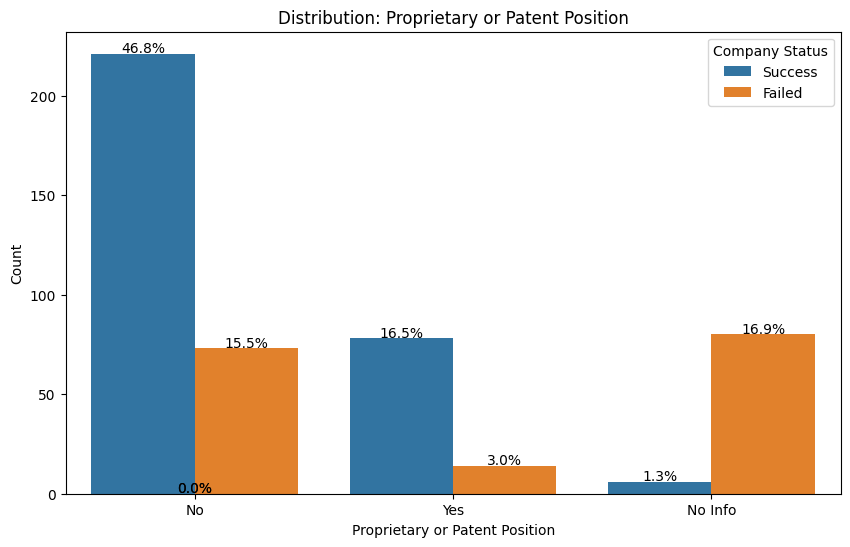

In [51]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Proprietary or patent position (competitive position)", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Proprietary or Patent Position')
plt.xlabel('Proprietary or Patent Position')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of Proprietary or Patent Position (Competitive Position)

The analysis of proprietary or patent position, which reflects the competitive stance of companies, offers insightful observations. Among successful companies, approximately 16.5% have a proprietary or patent position, significantly higher than the 3.0% of failed companies with this advantage. Conversely, a larger proportion of successful ventures, around 46.8%, do not possess a proprietary or patent position, compared to 15.5% of failed companies. These findings shed light on the role of proprietary or patent positions in company success, suggesting that while a notable percentage of successful ventures have such positions, a significant number thrive without them. This underscores the importance of other factors in determining company success beyond proprietary or patent positions.


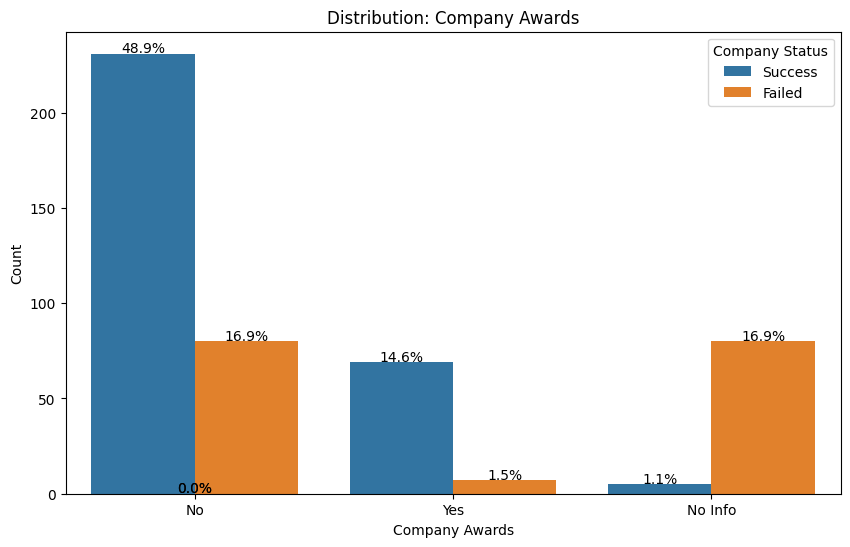

In [52]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Company awards", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Company Awards')
plt.xlabel('Company Awards')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of Company Awards

The analysis of company awards sheds light on the recognition received by companies. Among successful ventures, approximately 14.6% have received awards, a substantially higher proportion compared to the 1.5% of failed companies with similar accolades. Conversely, a significant portion of successful companies, approximately 48.9%, have not received any awards, contrasting with a smaller percentage of 16.9% among failed companies. These findings highlight the potential influence of company awards on company success, suggesting that successful ventures are more likely to receive recognition through awards compared to their unsuccessful counterparts. Moreover, the absence of awards may also indicate a potential factor contributing to the failure of certain companies.


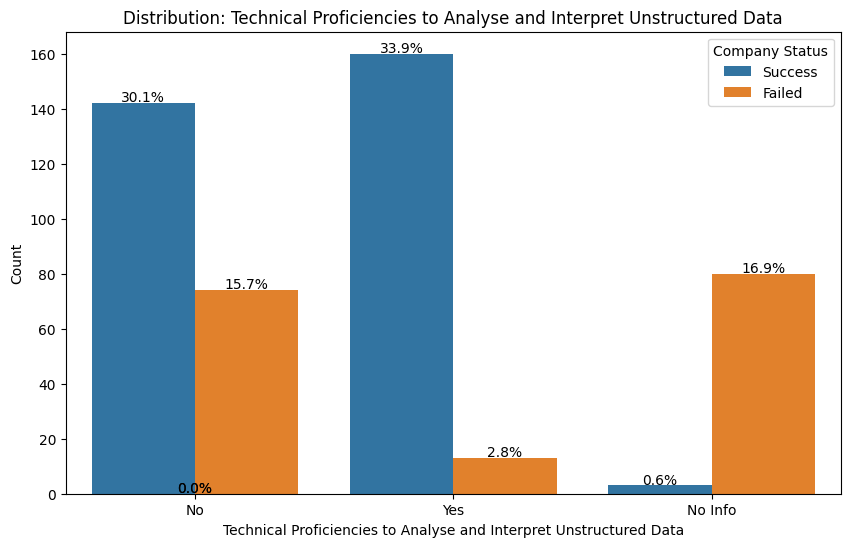

In [53]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Technical proficiencies to analyse and interpret unstructured data", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Technical Proficiencies to Analyse and Interpret Unstructured Data')
plt.xlabel('Technical Proficiencies to Analyse and Interpret Unstructured Data')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Analysis of Technical Proficiencies to Analyze and Interpret Unstructured Data

The analysis of technical proficiencies to analyze and interpret unstructured data reveals notable differences between successful and failed companies. Among successful companies, approximately 33.9% possess technical proficiencies to analyze and interpret unstructured data, which is substantially higher than the 2.8% among failed companies. Conversely, around 30.1% of successful companies do not possess these technical proficiencies, compared to a higher percentage of 15.7% among failed companies. These findings underscore the importance of technical capabilities in handling unstructured data and suggest that possessing such proficiencies may contribute significantly to a company's success in effectively leveraging unstructured data for decision-making and innovation.


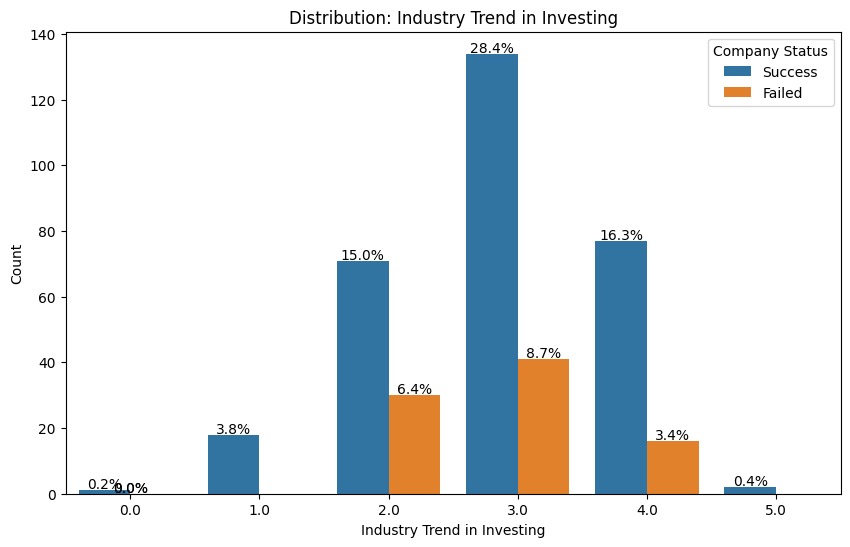

In [54]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Industry trend in investing", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Industry Trend in Investing')
plt.xlabel('Industry Trend in Investing')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()

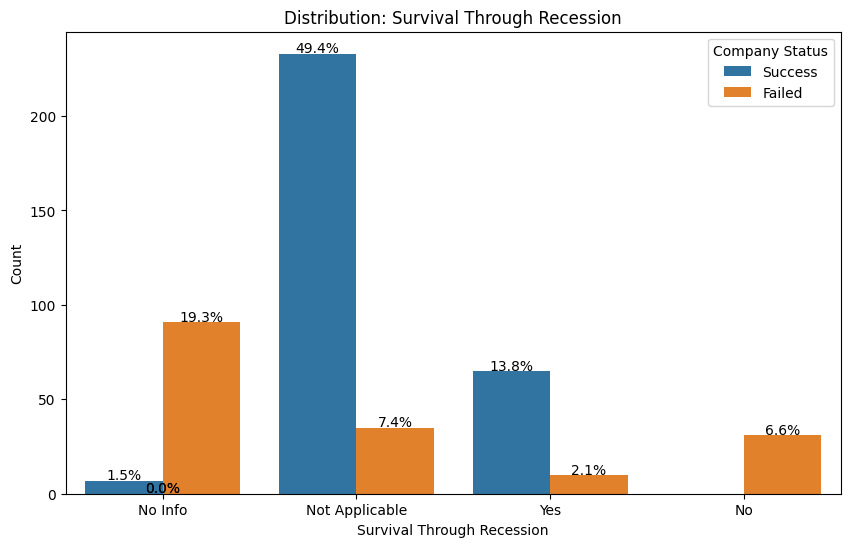

In [55]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Survival through recession, based on existence of the company through recession times", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Survival Through Recession')
plt.xlabel('Survival Through Recession')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()


Survival Through Recession

This variable indicates whether a company survived through recession times based on its existence during those periods. The distribution of this variable among successful and failed companies is as follows:

Not Applicable:

Success: 49.4%
Failed: 7.4%

Yes:

Success: 13.8%
Failed: 2.7%

No:

Success: 0.0%
Failed: 6.6%

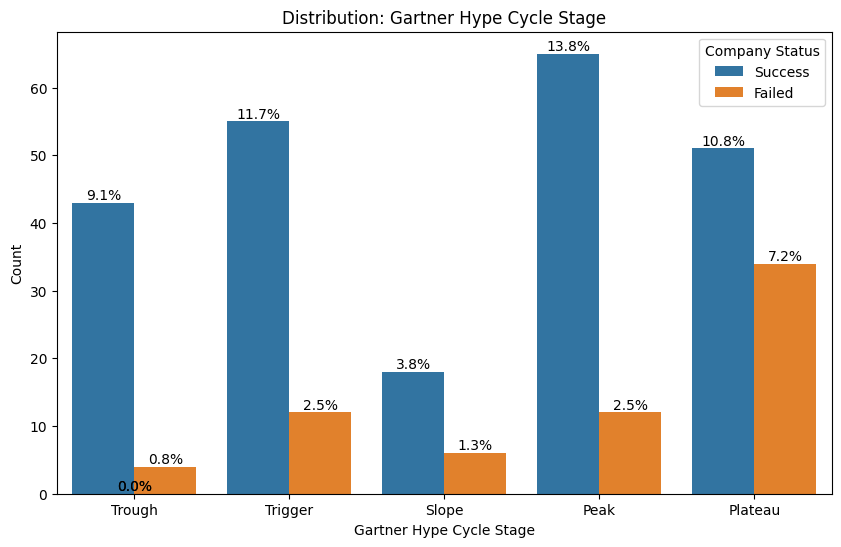

In [56]:

plt.figure(figsize=(10, 6))

ax = sns.countplot(x="Gartner hype cycle stage", hue='Dependent-Company Status', data=df)
plt.title('Distribution: Gartner Hype Cycle Stage')
plt.xlabel('Gartner Hype Cycle Stage')
plt.ylabel('Count')
plt.legend(title='Company Status')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100),
            ha="center")

plt.show()

# Conclusion
1. year of founding

Until 2008, many companies faced failures due to the crisis affecting numerous industries. However, by 2009, the situation began to stabilize, and thereafter, a significant number of companies started to experience success.


2. Continent of company

We can observe a notably high success rate across Europe, with only approximately one-eighth of the companies experiencing failure.

3. Number of Co-founders

The number of founders appears to influence a company's success significantly. Our analysis revealed that companies with a single founder are more prone to failure, whereas those with two founders exhibit the highest likelihood of success.

4. Presence of a top angel or venture fund in previous round of investment

Companies that attracted investors, whether through angel capital or venture funding, demonstrated a notably higher success rate compared to those that did not secure such investments

5. Focus on private or public data?

Companies sourcing their data from public rather than local sources exhibit a higher likelihood of success.

6. Focus on structured or unstructured data?

Companies who have structured or even unstructured data have a higher success rate then companies who have no data.

7. Local or global player

Companies that are considered global players prone to success rather than local players.

8. Big Data Business.

Big data companies demonstrate a success rate of 39.4%, with only 6.4% experiencing failure. In contrast, non-big data companies have a success rate of 25.2% and a failure rate of 28%

9. B2C or B2B venture?

B2B companies tend to succeed rather then B2C.


10. Survival through recession, based on existence of the company through recession times

Companies who have experienced recession have a lower chance of success than companies who haven't
